In [1]:
import numpy as np         #numpy is used for most of the mathematical (as np ables us to use it as a shortcut)
import matplotlib.pyplot as plt     # for charts and graphs
import pandas as pd



dataset = pd.read_csv('/kaggle/input/weather-type-classification/weather_classification_data.csv')   

dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


**Analyzing dataset feauters**

In [2]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(dataset)


Shape of DataFrame:  (13200, 11)

Columns in DataFrame:  ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location', 'Weather Type']

Data types of columns:
 Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-

**Preprocess the data**

In [3]:
X= dataset.iloc[:, 0:10].values        # stores all the values of the columns except the last one (because last one is dependant )
y= dataset.iloc[:, 10].values 

print(X)
print(y)






[[14.0 73 9.5 ... 'Winter' 3.5 'inland']
 [39.0 96 8.5 ... 'Spring' 10.0 'inland']
 [30.0 64 7.0 ... 'Spring' 5.5 'mountain']
 ...
 [30.0 77 5.5 ... 'Autumn' 9.0 'coastal']
 [3.0 76 10.0 ... 'Winter' 2.0 'inland']
 [-5.0 38 0.0 ... 'Autumn' 10.0 'mountain']]
['Rainy' 'Cloudy' 'Sunny' ... 'Cloudy' 'Snowy' 'Rainy']


**Encoding categorical Data**

In [4]:


from sklearn.preprocessing import LabelEncoder,OneHotEncoder
column = X[:, 4].reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
X = np.hstack((X[:, 0:4], efc[:,1:4], X[:,5:])) #dummy variable removed

print(X[:3, :])

column = X[:, 9].reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
X = np.hstack((X[:, 0:9], efc[:,1:], X[:,10:])) #dummy variable removed


print(X[:3, :])





[[14.0 73 9.5 82.0 0.0 0.0 1.0 1010.82 2 'Winter' 3.5 'inland']
 [39.0 96 8.5 71.0 0.0 0.0 1.0 1011.43 7 'Spring' 10.0 'inland']
 [30.0 64 7.0 16.0 0.0 0.0 0.0 1018.72 5 'Spring' 5.5 'mountain']]
[[14.0 73 9.5 82.0 0.0 0.0 1.0 1010.82 2 0.0 0.0 1.0 3.5 'inland']
 [39.0 96 8.5 71.0 0.0 0.0 1.0 1011.43 7 1.0 0.0 0.0 10.0 'inland']
 [30.0 64 7.0 16.0 0.0 0.0 0.0 1018.72 5 1.0 0.0 0.0 5.5 'mountain']]


In [5]:
column = X[:, 13].reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
X = np.hstack((X[:, 0:13], efc[:,1:])) #dummy variable removed


print(X[:3, :])


[[14.0 73 9.5 82.0 0.0 0.0 1.0 1010.82 2 0.0 0.0 1.0 3.5 1.0 0.0]
 [39.0 96 8.5 71.0 0.0 0.0 1.0 1011.43 7 1.0 0.0 0.0 10.0 1.0 0.0]
 [30.0 64 7.0 16.0 0.0 0.0 0.0 1018.72 5 1.0 0.0 0.0 5.5 0.0 1.0]]


In [6]:
column = y.reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
y = efc


print(y)


[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [8]:

from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state=0)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [9]:
print(y_train)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


**Training the model**

In [10]:
# buildinf the ANN
import keras
from keras.models import Sequential
from keras.layers import Dense


#intitialize ANN
classifier = Sequential()

# maiking the first hidden layer
classifier.add(Dense(units= 12, kernel_initializer = 'uniform', activation= 'relu', input_dim=15))

# adding second layer
classifier.add(Dense(units= 12, kernel_initializer = 'uniform', activation= 'relu'))


#adding the output layer
classifier.add(Dense(units= 4, kernel_initializer = 'uniform', activation= 'softmax'))

#compiling sll the layers
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


#fitting into train set
classifier.fit(X_train,y_train,batch_size=10, epochs= 100)


2024-06-29 15:59:30.154410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 15:59:30.154492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 15:59:30.156243: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5098 - loss: 1.0180
Epoch 2/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8756 - loss: 0.4330
Epoch 3/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8936 - loss: 0.3243
Epoch 4/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8927 - loss: 0.3128
Epoch 5/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8983 - loss: 0.2856
Epoch 6/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8987 - loss: 0.2745
Epoch 7/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9030 - loss: 0.2541
Epoch 8/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9047 - loss: 0.2383
Epoch 9/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9069 - loss: 0.2474
Epoch 10/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9057 - loss: 0.2347
Epoch 11/100
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9106 - loss: 0.2291
Epoch 12/100
1056/1056 ━━━━━━━━

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[584  54   2  19]
 [ 32 638   5   7]
 [ 17  29 607  11]
 [ 22  27   4 582]]


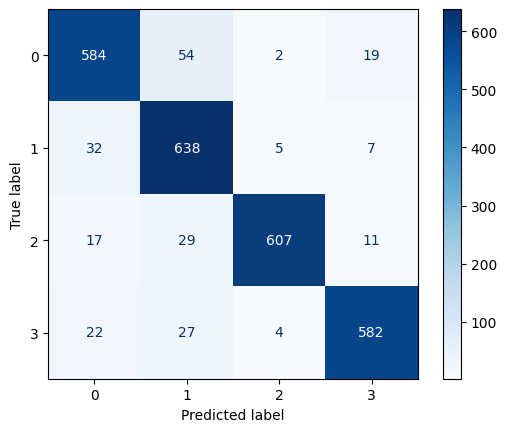

In [17]:

y_pred = classifier.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Ensure y_test is the true class labels, not one-hot encoded
y_true = np.argmax(y_test, axis=1)  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)

print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()